# Plots

Notebook to build plots for final report. No pressure to use this - just using it to make my life easier!

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,3)

atm = pd.read_csv('ATM_sample.csv')
atm.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,1018,10,1,0,0,0,72.750556
1,974,10,1,1,0,0,66.720482
2,96,2,0,0,0,1,19.189516
3,958,9,1,1,0,1,67.388669
4,103,4,0,1,0,1,15.813127


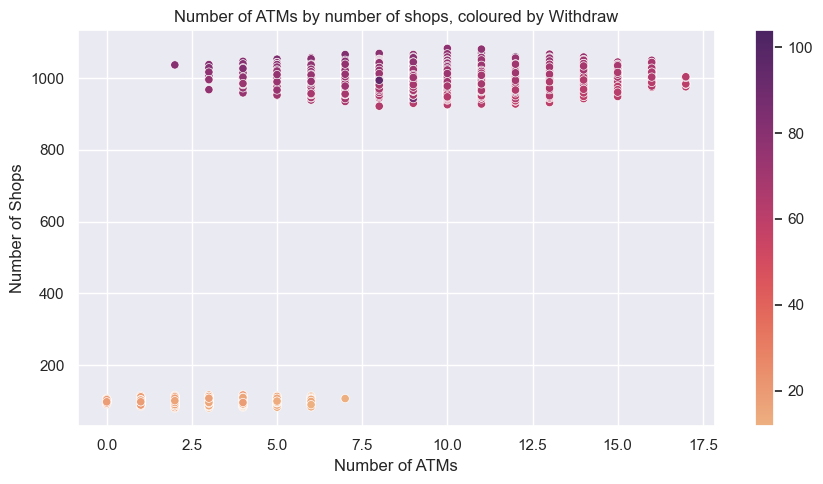

In [48]:
fig_name = 'atms_by_shops.jpg'

# Create logic for colorbar
# See: https://stackoverflow.com/questions/49761221/make-seaborn-show-a-colorbar-instead-of-a-legend-when-using-hue-in-a-bar-plot/49772083#49772083
cmap = sns.color_palette("flare", as_cmap=True)
norm = plt.Normalize(atm['Withdraw'].min(), atm['Withdraw'].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Create plot
plt.figure(figsize=(9,5))
ax = sns.scatterplot(x='ATMs', y='Shops', data=atm, hue='Withdraw', palette = cmap)

# Set titles
ax.set_xlabel('Number of ATMs')
ax.set_ylabel('Number of Shops')
ax.set_title('Number of ATMs by number of shops, coloured by Withdraw')

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm, ax=ax)

plt.tight_layout()
plt.savefig(f'./plots/{fig_name}')
plt.show()

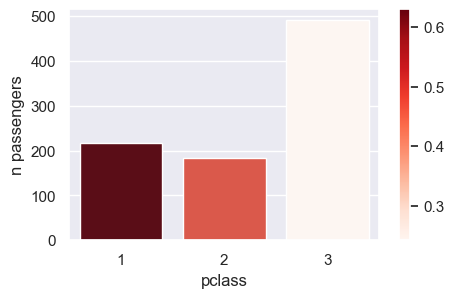

In [38]:
titanic = sns.load_dataset("titanic")
g = titanic.groupby('pclass')
survival_rates = g['survived'].mean()
n = g.size()

norm = plt.Normalize(survival_rates.min(), survival_rates.max())
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)

ax = sns.barplot(x=n.index, y=n, hue=survival_rates, palette='Reds', 
                 dodge=False)

ax.set_ylabel('n passengers')
ax.get_legend().remove()
ax.figure.colorbar(sm, ax=ax)

plt.show()

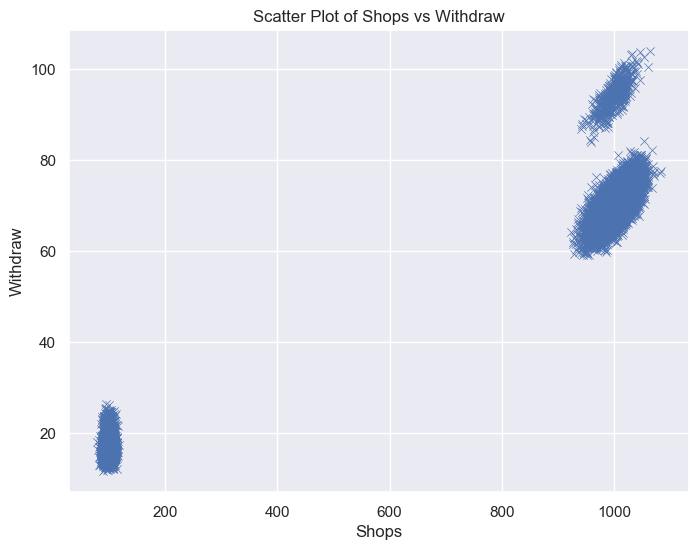

In [18]:
# Scatter Plot for Shops vs Withdraw
plt.figure(figsize=(8, 6))
sns.scatterplot(x=atm['Shops'], y=atm['Withdraw'], marker='x')
plt.title('Scatter Plot of Shops vs Withdraw')
plt.xlabel('Shops')
plt.ylabel('Withdraw')
plt.show()